In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [161]:
df = pd.read_csv('./clean/data_with_fight_stats.csv')
df.columns

Index(['Unnamed: 0', 'outcome', 'time', 'fights_f1', 'fights_f2',
       'win_proportion_f1', 'win_proportion_f2', 'height_diff', 'reach_diff',
       'kd', 'subatt', 'rev', 'ctrl', 'sigster_throw', 'sigster_land',
       'total_str_throw', 'total_str_land', 'td_throw', 'td_land',
       'head_throw', 'body_throw', 'leg_throw', 'clinch_throw', 'ground_throw',
       'weightclass_flw', 'weightclass_ftw', 'weightclass_hw',
       'weightclass_lhw', 'weightclass_lw', 'weightclass_mw',
       'weightclass_wbw', 'weightclass_wflw', 'weightclass_wsw',
       'weightclass_ww', 'method_dec_spl', 'method_dec_una', 'method_dq',
       'method_ko_tko', 'method_sub', 'method_tko_doc', 'round_x_2',
       'round_x_3', 'round_x_4', 'round_x_5', 'stance_x_Orthodox',
       'stance_x_Southpaw', 'stance_x_Switch', 'stance_y_Orthodox',
       'stance_y_Southpaw', 'stance_y_Switch'],
      dtype='object')

In [162]:
df.head()

,Unnamed: 0,outcome,time,fights_f1,fights_f2,win_proportion_f1,win_proportion_f2,height_diff,reach_diff,kd,...,round_x_2,round_x_3,round_x_4,round_x_5,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch,stance_y_Orthodox,stance_y_Southpaw,stance_y_Switch
0,0,0.0,300,5.0,5.0,0.200000,0.4,-1.0,1.0,0.141818,...,0,0,0,1,1,0,0,1,0,0
1,1,1.0,300,6.0,5.0,0.166667,0.4,-2.0,1.0,0.050909,...,0,0,0,1,1,0,0,1,0,0
2,2,0.0,292,5.0,5.0,0.400000,0.4,-1.0,-1.0,0.117895,...,1,0,0,0,1,0,0,1,0,0
3,3,1.0,300,7.0,5.0,0.571429,0.4,-3.0,2.0,0.113846,...,0,1,0,0,1,0,0,1,0,0
4,4,0.0,300,1.0,5.0,1.000000,0.4,-2.0,0.0,-0.040000,...,0,1,0,0,0,1,0,1,0,0


In [163]:
df.drop(['Unnamed: 0','fights_f1', 'fights_f2',
       'win_proportion_f1', 'win_proportion_f2'], axis=1, inplace=True)

In [164]:
#Creates y and X variables
y= df['outcome'] #Outcome = 1 means figher 1 won, Outcome = 2 means fighter 2 won
X = df.loc[:, df.columns != 'outcome']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

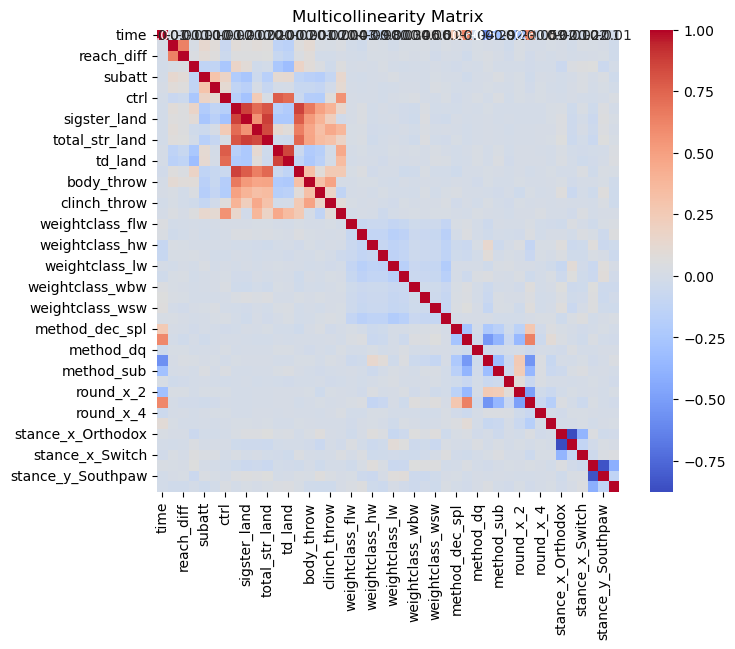

In [165]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Multicollinearity Matrix')
plt.show()

In [166]:
import statsmodels.api as sm

#Log regression similar to glm in R
# Add a constant term for the intercept
b = sm.add_constant(X_train_orig)
log_reg = sm.Logit(y_train, X_train_orig).fit(maxiter=2000) 

# printing the summary table 
print(log_reg.summary()) 
p_values=log_reg.pvalues
# Select significant features with p-values less than 0.05
significant_features = X_train_orig.columns[p_values < 0.05]

print("Significant features:")
print(significant_features)

Optimization terminated successfully.
         Current function value: 0.609825
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                 3493
Model:                          Logit   Df Residuals:                     3450
Method:                           MLE   Df Model:                           42
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.1087
Time:                        13:27:13   Log-Likelihood:                -2130.1
converged:                       True   LL-Null:                       -2389.9
Covariance Type:            nonrobust   LLR p-value:                 1.376e-83
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
time                  0.0011      0.001      1.677      0.094      -0.000       0.002
height_d

In [167]:
# # Get feature importances from the trained model
# feature_importances = rnd_clf.feature_importances_

# # Get the names of features
# feature_names = X.columns

# # Sort feature importances and names in descending order
# indices = np.argsort(feature_importances)[::-1]
# sorted_feature_names = feature_names[indices]

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importances")
# plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
# plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha='right')
# plt.xlabel("Feature Name")
# plt.ylabel("Feature Importance")

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def find_best_lasso_model(X_train, y_train, X_test, y_test):
    # Create Logistic Regression model with L1 regularization (Lasso)
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

    # Define parameter grid for alpha
    param_grid = {
        'C': np.logspace(-3, 3, 7)  # C is the inverse of alpha
    }

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='accuracy',
                               verbose=1, n_jobs=-1)

    # Fit GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get best alpha
    best_alpha = grid_search.best_params_['C']

    # Create and return best Lasso model with the best alpha
    best_lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=best_alpha, random_state=42)
    
    # Train the best model on the full training set
    best_lasso_model.fit(X_train, y_train)
    
    # Select features with non-zero coefficients
    non_zero_coef_indices = np.where(best_lasso_model.coef_[0] != 0)[0]
    X_train_selected = X_train[:, non_zero_coef_indices]
    X_test_selected = X_test[:, non_zero_coef_indices]
    
    # Make predictions on test set
    y_test_pred = best_lasso_model.predict(X_test)
    
    # Calculate accuracy for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print classification report for test set
    print("Classification Report for Test Set:")
    print(classification_report(y_test, y_test_pred))
    
    return test_accuracy, X_train_selected, X_test_selected

# Example usage
test_accuracy, X_train_lasso, X_test_lasso = find_best_lasso_model(X_train, y_train, X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57       624
         1.0       0.69      0.78      0.73       873

    accuracy                           0.67      1497
   macro avg       0.66      0.65      0.65      1497
weighted avg       0.66      0.67      0.66      1497

Test Accuracy: 0.6693386773547094


In [169]:
X_train_lasso.shape

(3493, 33)

In [170]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint

def find_best_model(X_train, y_train, models):
    best_models = {}
    
    for model_name, model in models.items():
        print(f"Searching for best {model_name}...")
        
        # Define parameter grid for each model
        param_dist = {}
        if model_name == 'Logistic Regression':
            param_dist = {
                'C': np.logspace(-3, 3, 7),
                'penalty': ['l1', 'l2']
            }
        elif model_name == 'Random Forest Classifier':
            param_dist = {
                "n_estimators": randint(100, 1000),
                "max_features": ['auto', 'sqrt', 'log2'],
                "max_depth": [None] + list(range(5, 30)),
                "min_samples_split": randint(2, 20),
                "min_samples_leaf": randint(1, 20),
                "bootstrap": [True, False]
            }
        
        # Create RandomizedSearchCV object
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=5, scoring='accuracy',
                                           verbose=1, random_state=42, n_jobs=-1)
        
        # Fit RandomizedSearchCV object to the data
        random_search.fit(X_train, y_train)
        
        # Print best parameters and score
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best accuracy for {model_name}: {random_search.best_score_}\n")
        
        # Save best model
        best_models[model_name] = random_search.best_estimator_
    
    return best_models

# Example usage
best_models_lasso = find_best_model(X_train_lasso, y_train, {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier()
})

evaluation_results = evaluate_best_models(X_test_lasso, y_test, best_models_lasso)


Searching for best Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 10.0}
Best accuracy for Logistic Regression: 0.6467229074691229

Searching for best Random Forest Classifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ddron\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ddron\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ddron\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ddron\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

Best parameters for Random Forest Classifier: {'bootstrap': False, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 554}
Best accuracy for Random Forest Classifier: 0.6782116080688334

Evaluation results for Logistic Regression:
Accuracy: 0.6693386773547094
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57       624
         1.0       0.69      0.78      0.73       873

    accuracy                           0.67      1497
   macro avg       0.66      0.65      0.65      1497
weighted avg       0.66      0.67      0.66      1497


Evaluation results for Random Forest Classifier:
Accuracy: 0.676686706746827
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.50      0.56       624
         1.0       0.69      0.80      0.74       873

    accuracy                           0.68      1497
   macro avg     

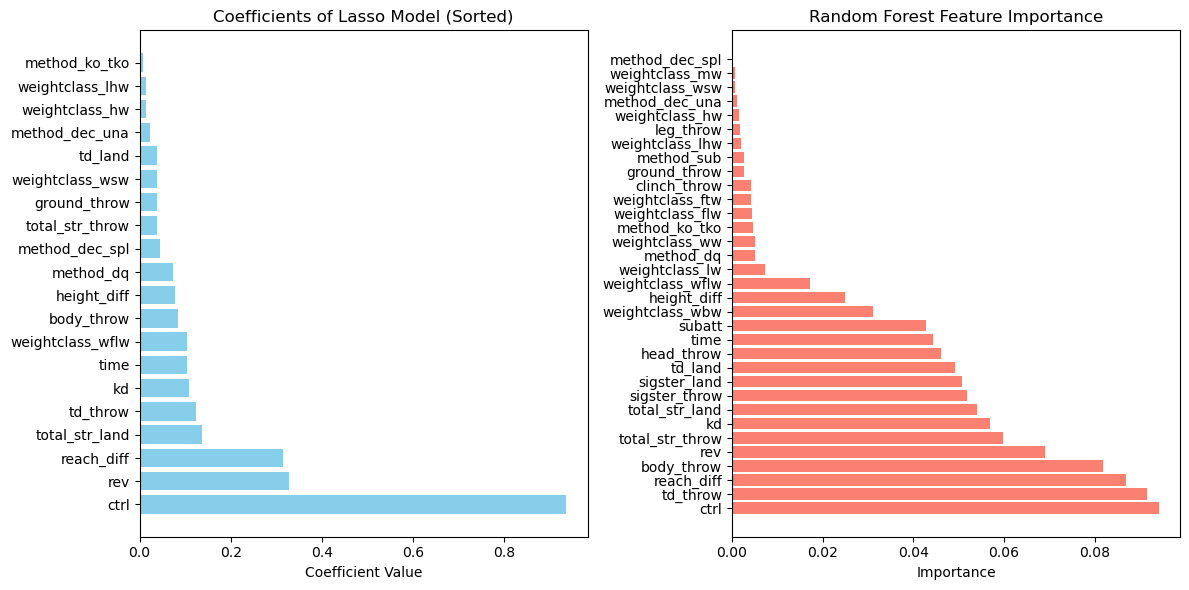

In [187]:
feature_names=X.columns
# Get feature importance for Logistic Regression
lasso_coefficients = best_models_lasso['Logistic Regression'].coef_[0]
lasso_feature_names = feature_names

# Filter coefficients and feature names where coefficient is greater than zero
selected_coefficients = [coef for coef, name in zip(lasso_coefficients, lasso_feature_names) if coef > 0]
selected_feature_names = [name for coef, name in zip(lasso_coefficients, lasso_feature_names) if coef > 0]

# Sort the coefficients and feature names based on coefficients
sorted_indices = np.argsort(selected_coefficients)[::-1]
sorted_coefficients = [selected_coefficients[i] for i in sorted_indices]
sorted_feature_names = [selected_feature_names[i] for i in sorted_indices]

# Get feature importance for Random Forest
rf_importance = best_models_lasso['Random Forest Classifier'].feature_importances_
sorted_indices_rf = np.argsort(rf_importance)[::-1]

#

# Plot the coefficients
# Plot feature importance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Lasso Model (Sorted)')

plt.subplot(1, 2, 2)
plt.barh([feature_names[i] for i in sorted_indices_rf], rf_importance[sorted_indices_rf], color='salmon')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()